<div style="border:solid purple 2px; padding: 20px"> 

Привет Иван! 👋

Меня зовут Рустам Муртазин, и я буду делать ревью твоей работы. Давай будем общаться на **«ты»**. Если это неприемлемо, обязательно напиши мне в комментариях — мы перейдем на **«вы»**.

Я не хочу указавать тебе на совершенные тобою ошибки, а хочу поделиться своим опытом и помочь тебе стать настоящим профессионалом и сделать проект еще лучше.

Обрати внимание в первую очередь на те, что помечаны <span style="color:red">красным цветом</span>. После их доработки проект будет принят. <span style="color:green">Зеленым цветом</span> отмечены удачные и элегантные решения, на которые можно опираться в будущих проектах. <span style="color:orange">Оранжевым цветом</span> выделено то, что в следующий раз можно сделать по-другому. Ты можешь учесть эти комментарии при выполнении будущих заданий или доработать проект сейчас (однако это не обязательно). Также в проекте могут быть небольшие «лайфхаки» по Python, не относящиеся к проекту, их я выделил фиолетовым цветом)

Давай работать над проектом в диалоге: если ты **что-то меняешь** в проекте по моим рекомендациям — **пиши об этом**. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения. Пожалуйста, **не перемещай, не изменяй и не удаляй мои комментарии**. Всё это поможет выполнить повторную проверку твоего проекта оперативнее».

По проекту есть пару замечаний, но их не много, я думаю ты быстро справишься. Жду твою работу на повторное ревью :)


<div class="alert alert-success">
<h2> Комментарий ревьюера v3 ✔️ <a class="tocSkip"> </h2>

Спасибо за твое терпение! Все моменты были исправлены, поэтому работу я принимаю. Впереди много интересного, желаю успехов 😉
    
</div>

# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
pd.set_option('display.max_columns', None)
from scipy.stats import t

<div style="border:solid purple 5px; padding: 20px"> 
<h2 align="center"> Рубрика «Питонячий лайфхакер» <a class="tocSkip"> </h2>

<h3> Широкоформатный Jupyter <a class="tocSkip"> </h3>

Расширяем границы, или как сделать работу более комфортной (не всем нравится 😄)

    from IPython.core.display import display, HTML
    display(HTML("<style>.container { width:90% !important; }</style>"))

## Загрузка и подготовка данных

In [2]:
try:
    data_0 = pd.read_csv('geo_data_0.csv')
except:
    data_0 = pd.read_csv('/datasets/geo_data_0.csv')

<div class="alert alert-success">
<h2> Комментарий ревьюера ✔️ <a class="tocSkip"> </h2>

Здорово, что ты используешь конструкцию `try-except`, это повышает отказоустойчивость кода

</div>


In [3]:
try:
    data_1 = pd.read_csv('geo_data_1.csv')
except:
    data_1 = pd.read_csv('/datasets/geo_data_1.csv')

In [4]:
try:
    data_2 = pd.read_csv('geo_data_2.csv')
except:
    data_2 = pd.read_csv('/datasets/geo_data_2.csv')

In [5]:
display(data_0.head(), data_1.head(), data_2.head())

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


<div class="alert alert-warning">
<h2> Комментарий ревьюера ⚠️ <a class="tocSkip"> </h2>

В данном проекте мы работаем с данными одинаковой природы, а это значит, что большинство расчетов для регионов будут повторяться. Это отличная возможность потренироваться над оптимизацией кода. Например, вот здесь. Первичное знакомство с данными можно было реализовать в функции и вызывать эту функцию для каждого из датафреймов (в цикле в идеале). В нее можно включить все основные методы типа `head`, `info` и т.д.  Можно графики строить какие-нибудь... Из готового, я бы рекомендовал почитать про [pandas_profiling](https://habr.com/ru/company/ruvds/blog/451478/?)


In [6]:
display(data_0.info(), data_1.info(), data_2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null 

None

None

None

In [7]:
(data_0.duplicated() | data_1.duplicated() | data_2.duplicated()).sum()

0

<div class="alert alert-warning">
<h2> Комментарий ревьюера ⚠️ <a class="tocSkip"> </h2>

Да, полных дубликатов нет, но я бы посмотрел по `id` все ли записи уникальные и относятся к разным скважинам, или есть какие-то артефакты...


<div class="alert alert-warning">
<h2> Комментарий ревьюера ⚠️ <a class="tocSkip"> </h2>

Возможно стоило посмотреть еще на корреляции признаков, потому что мультиколлинеарность негативно влияет на качество моделей. А построение диаграмм рассеяния позволит виявить нелинейные связи

<div class="alert alert-warning">
<h2> Комментарий ревьюера ⚠️ <a class="tocSkip"> </h2>

А еще, я бы построил графики распределений признаков - много полезной информации можно получить

In [8]:
def train_split(data):
    target = data['product']
    features = data.drop(['id', 'product'], axis=1)
    features_train, features_valid, target_train, target_valid = train_test_split(
        features, target, test_size=0.25, random_state=12345)
    scaler = StandardScaler()
    scaler.fit(features_train)
    features_train = scaler.transform(features_train)
    features_valid = scaler.transform(features_valid)
    return features_train, features_valid, target_train, target_valid

<div class="alert alert-success">
<h2> Комментарий ревьюера ✔️ <a class="tocSkip"> </h2>

Круто, что ты фиксируешь `random_state`. Кстати, его можно задать один раз в начале проекта, например, используя любимый нами [numpy](https://pyprog.pro/random_sampling_functions/seed.html?)


In [9]:
features_train_0, features_valid_0, target_train_0, target_valid_0 = train_split(data_0)
features_train_1, features_valid_1, target_train_1, target_valid_1 = train_split(data_1)
features_train_2, features_valid_2, target_train_2, target_valid_2 = train_split(data_2)

## Обучение и проверка модели

In [10]:
model_0 = LinearRegression().fit(features_train_0, target_train_0)
predictions_0 = pd.Series(model_0.predict(features_valid_0), index=target_valid_0.index)
rmse_0 = mean_squared_error(target_valid_0, predictions_0) ** 0.5
dummy_rmse_0 = mean_squared_error(target_valid_0, pd.Series(target_valid_0.mean(), index=target_valid_0.index)) ** 0.5
mean_target_0 = round(data_0['product'].mean(), 5)
print(rmse_0, dummy_rmse_0)

37.5794217150813 44.28602687855358


<div class="alert alert-success">
<h2> Комментарий ревьюера ✔️ <a class="tocSkip"> </h2>

У метрики `MSE` есть встроенная возможность сразу считать rmse. Вот [здесь](https://stackoverflow.com/questions/17197492/is-there-a-library-function-for-root-mean-square-error-rmse-in-python) про это пишут


In [11]:
model_1 = LinearRegression().fit(features_train_1, target_train_1)
predictions_1 = pd.Series(model_1.predict(features_valid_1), index=target_valid_1.index)
rmse_1 = mean_squared_error(target_valid_1, predictions_1) ** 0.5
dummy_rmse_1 = mean_squared_error(target_valid_1, pd.Series(target_valid_1.mean(), index=target_valid_1.index)) ** 0.5
print(rmse_1, dummy_rmse_1)
mean_target_1 = round(data_1['product'].mean(),5)

0.893099286775617 46.0212449226281


In [12]:
model_2 = LinearRegression().fit(features_train_2, target_train_2)
predictions_2 = pd.Series(model_2.predict(features_valid_2), index=target_valid_2.index)
rmse_2 = mean_squared_error(target_valid_2, predictions_2) ** 0.5
dummy_rmse_2 = mean_squared_error(target_valid_2, pd.Series(target_valid_2.mean(), index=target_valid_2.index)) ** 0.5
print(rmse_2, dummy_rmse_2)
mean_target_2 = round(data_2['product'].mean(),5)

40.02970873393434 44.902084376898294


In [13]:
print(f'''Среднее количество сырья для первого региона (data_0) = {mean_target_0}
RMSE модели на валидационной выборке = {rmse_0}''')

Среднее количество сырья для первого региона (data_0) = 92.5
RMSE модели на валидационной выборке = 37.5794217150813


In [14]:
print(f'''Среднее количество сырья для второго региона (data_1) = {mean_target_1}
RMSE модели на валидационной выборке = {rmse_1}''')

Среднее количество сырья для второго региона (data_1) = 68.825
RMSE модели на валидационной выборке = 0.893099286775617


In [15]:
print(f'''Среднее количество сырья для первого региона (data_2) = {mean_target_2}
RMSE модели на валидационной выборке = {rmse_2}''')

Среднее количество сырья для первого региона (data_2) = 95.0
RMSE модели на валидационной выборке = 40.02970873393434


Все модели сравнены с дамми-моделью из констант - их показатели выше. 

Среднее количество сырья во втором региона сильно ниже, чем в двух других. При этом признаки проколов в данном регионе сильно точнее позволили модели предсказать количество сырья на валидационной выборке

<div class="alert alert-success">
<h2> Комментарий ревьюера ✔️ <a class="tocSkip"> </h2>

Такое различие в результатах мне кажется подозрительным. Явно со вторым регионом что-то не то. Я бы обязательно подсвятил это перед заказчиком

## Подготовка к расчёту прибыли

При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
Бюджет на разработку скважин в регионе — 10 млрд рублей.
При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.

In [16]:
BUDGET_WELL = 10_000_000_000
N_WELLS = 500
N_BEST_WELLS = 200
BARREL = 450_000

In [17]:
MEAN_PRODUCT = BUDGET_WELL / (BARREL * N_BEST_WELLS)

In [18]:
print('Среднее количество продукта с прокола для окупаемости должно составлять', round(MEAN_PRODUCT, 5))

Среднее количество продукта с прокола для окупаемости должно составлять 111.11111


In [19]:
print(f'''Среднее количество продукта для регионов:
Первый - {mean_target_0}
Второй - {mean_target_1}
Третий - {mean_target_2}''')

Среднее количество продукта для регионов:
Первый - 92.5
Второй - 68.825
Третий - 95.0


#### Вывод
Среднее значение продукта для окупаемости выше, чем среднее количество продукта фактически. Для определения шансов окупаемости требуется дальнейшее исследование

<div class="alert alert-success">
<h2> Комментарий ревьюера ✔️ <a class="tocSkip"> </h2>

Так и есть, это может говорить о том, что мы не можем рандомно выбирать скважины для разработки, ведь в таком случае, нас, возможно, ждет неудача

## Расчёт прибыли и рисков 

In [20]:
state = np.random.RandomState(12345)

In [21]:
#функция для расчета дохода 200 лучших проколов
def revenue(predictions, target):
    predictions = predictions.sort_values(ascending=False)[:200]
    return target[predictions.index].sum() * BARREL - BUDGET_WELL

<div class="alert alert-success">
<h2> Комментарий ревьюера ✔️ <a class="tocSkip"> </h2>

Сортируем по прогнозам, берем факт 👍


#### Расчет прибыли и рисков для первого региона

In [22]:
#подбор выборок из 500 проколов и подсчет дохода с помощью функции
values=[]
for i in range(1000):
    values.append(revenue(predictions_0.sample(n=500, replace=True, random_state=state), target_valid_0))

<div class="alert alert-danger">
<h2> Комментарий ревьюера ❌ <a class="tocSkip"> </h2>

Важно, чтобы бутстреп проводился корректно, т.е. с возвращением. Мы как бы имитируем тут новую геологоразведку по району из старой, это нормально, что скважины могут получиться похожими, мы не можем сказать, что в новой геологоразведке такой ситуации не возникнет. Ну и плюс иначе мы ограничены в размерах подвыборки размерами исходной выборки, в общем случае, если сэмплирование делать без возвращения.

P.S. Проверь, чтобы в итоге в расчете участвовало ровно 200 скважин

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>КОММЕНТАРИЙ СТУДЕНТА</b></u></font>
    <br />
    <font color='4682B4'>Не очень понимаю как это в принципе возможно исследовать один прокол несколько раз и учитывать эти данные при разработки новой. То есть может так оказаться, что мы 500 раз возьмем один и тот же прокол, он выдаст нам результат и мы такие класс, делаем тут. Или в реальном исследовании, чтобы чуваки сознательно брали несколько раз один и тот же прокол?
    Я бы конечно поменял на тру, если бы это все что требовалось. Но пандас выдает ошибку из-за дублированных индексов. Это не решить (или я не знаю как) без удаления/изменения индексов, а этого делать нельзя, потому что они нам нужны, чтобы брать данные из валидационного таргета
    P.S. Проверял/проверил, каждый раз берет 200</font>
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 ✔️ <a class="tocSkip"> </h2>

Так мы предполагаем, что скважины могут быть похожу друг на друга)

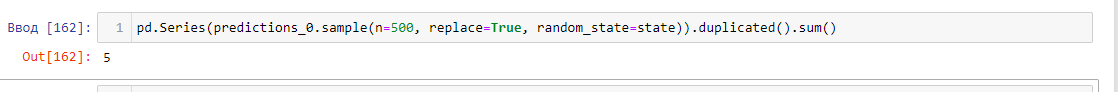
ValueError: cannot reindex on an axis with duplicate labels

ошибка которую выдает компилятор на строчке predictions = pd.Series(predictions, index=target.index)

Ответа в сети кроме описанного не нашёл. Ответа в пачке нет. 

<div class="alert alert-danger">
<h2> Комментарий ревьюера v2 ❌ <a class="tocSkip"> </h2>

А тебе и не нужна это строка. Ты ведь уже соотнес индексы, т.е target_valid_0 и predictions_0 имеют одинаковые индексы

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>КОММЕНТАРИЙ СТУДЕНТА</b></u></font>
    <br />
    <font color='4682B4'>Ясно. Полдня потратил, чтобы найти способ исправления ошибки. Убрал ее из функции</font>
</div>

In [23]:
#95% интервал
values=pd.Series(values)
values.loc[(values>values.quantile(.025))&(values<values.quantile(.975))]
print(f'''Нижняя граница = {values.quantile(.025)}
Верхняя граница = {values.quantile(0.975)}''')

Нижняя граница = -111215545.89049526
Верхняя граница = 909766941.5534226


<div class="alert alert-danger">
<h2> Комментарий ревьюера ❌ <a class="tocSkip"> </h2>

Доверительный интервал считается по другим процентилям, плюс этот расчет необходим не для какой-либо фильтрации данных, а как статистическая информация, т.е этот интервал нужно просто вывести

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>КОММЕНТАРИЙ СТУДЕНТА</b></u></font>
    <br />
    <font color='4682B4'>Исправил</font>
</div>

In [24]:
mean_0 = values.mean()
mean_0

396164984.8023711

In [25]:
#расчет рисков убытка для региона
risk_0 = (values < 0).mean()
risk_0

0.069

<div class="alert alert-success">
<h2> Комментарий ревьюера ✔️ <a class="tocSkip"> </h2>

Расчет рисков можно было выполнить проще, например, так 
    
```python
risk = (values < 0).mean()
```

Либо можно использовать [percentileofscore](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html) от `scipy`


#### Расчет прибыли и рисков для второго региона

In [26]:
#подбор выборок из 500 проколов и подсчет дохода с помощью функции
values=[]
for i in range(1000):
    values.append(revenue(predictions_1.sample(n=500, replace=True, random_state=state), target_valid_1))

In [27]:
#95% интервал
values=pd.Series(values)
values.loc[(values>values.quantile(.025))&(values<values.quantile(.975))]
print(f'''Нижняя граница = {values.quantile(.025)}
Верхняя граница = {values.quantile(0.975)}''')

Нижняя граница = 78050810.7517417
Верхняя граница = 862952060.2637234


In [28]:
mean_1 = values.mean()
mean_1

461155817.2772397

In [29]:
#расчет рисков убытка для региона
risk_1 =  (values < 0).mean()
risk_1

0.007

#### Расчет прибыли и рисков для третьего региона

In [30]:
#подбор выборок из 500 проколов и подсчет дохода с помощью функции
values=[]
for i in range(1000):
    values.append(revenue(predictions_2.sample(n=500, replace=True, random_state=state), target_valid_2))

In [31]:
#95% интервал
values=pd.Series(values)
values.loc[(values>values.quantile(.025))&(values<values.quantile(.975))]
print(f'''Нижняя граница = {values.quantile(.025)}
Верхняя граница = {values.quantile(0.975)}''')

Нижняя граница = -112227625.37857565
Верхняя граница = 934562914.5511636


In [32]:
mean_2 = values.mean()
mean_2

392950475.17060447

In [33]:
#расчет рисков убытка для региона
risk_2 = (values < 0).mean()
risk_2

0.065

### Вывод

Исследование данных позволило изучить все 3 региона:
* С помощью модели LinearRegression на основе данных по регионам я получил предсказания по признакам каждого прокола
* Зная расходы для открытия новых проколов, подсчитал, что в среднем 200 проколов должны содержать 111т. бареллей нефти для окупаемости
* С помощью реализации техники bootstrap я случайно отобрал по 500 (это количество точек для исследования в каждом регионе) точек и из них 200 самых прибыльных, основываясь на предсказании модели
* Средний доход и риски для каждого региона:
* * Первый регион: риск убытков = 6.9%. Средний доход с прокола = 396млн.
* * Второй регион: риск убытков = 0.7%. Средний доход прокола = 461млн.
* * Третий регион: риск убытков = 6.5%. Средний доход прокола = 393млн.

Второй региона самый прибыльный для исследования проколов и открытия новых. Риск убытков 0.7%, средний доход с одного прокола почти на 10% выше, чем в других регионах. Остальные регионы не подходят под критерий (риск > 2.5%)

<div class="alert alert-danger">
<h2> Комментарий ревьюера ❌ <a class="tocSkip"> </h2>

Не забудь проверить выводы после внесения всех правок

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: модели обучены и проверены
    - [x]  Данные корректно разбиты на обучающую и валидационную выборки
    - [x]  Модели обучены, предсказания сделаны
    - [x]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [x]  На экране напечатаны результаты
    - [x]  Сделаны выводы
- [x]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [x]  Для всех ключевых значений созданы константы Python
    - [x]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [x]  По предыдущему пункту сделаны выводы
    - [x]  Написана функция расчёта прибыли
- [x]  Выполнен шаг 4: посчитаны риски и прибыль
    - [x]  Проведена процедура *Bootstrap*
    - [x]  Все параметры бутстрепа соответствуют условию
    - [x]  Найдены все нужные величины
    - [x]  Предложен регион для разработки месторождения
    - [x]  Выбор региона обоснован